# analysis.ipynb: Analyze the data from Geant4 simulation

In [1]:
import numpy as np
from matplotlib import pyplot as plt

SiPMCount = 2

Here data is read from a csv file

In [2]:
rawData_z = np.loadtxt('../data/muon_z.csv', delimiter=',')

zPosition = rawData_z[:, 0]
energy_z = rawData_z[:, 3]
mean_z = np.empty((SiPMCount, rawData_z.shape[0]))
rms_z = np.empty((SiPMCount, rawData_z.shape[0]))

for SiPMNb in range(SiPMCount):
    mean_z[SiPMNb] = rawData_z[:, 2*SiPMNb+4]
    rms_z[SiPMNb] = rawData_z[:, 2*SiPMNb+5]

/tmp/ipykernel_2718452/3842119651.py:1: UserWarning: loadtxt: Empty input file: "../data/muon_z.csv"
  rawData_z = np.loadtxt('../data/muon_z.csv', delimiter=',')


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [16]:
rawData_x = np.loadtxt('../data/muon_x.csv', delimiter=',')

xPosition = rawData_x[:, 1]
energy_x = rawData_x[:, 3]
mean_x = np.empty((SiPMCount, rawData_x.shape[0]))
rms_x = np.empty((SiPMCount, rawData_x.shape[0]))

for SiPMNb in range(SiPMCount):
    mean_x[SiPMNb] = rawData_x[:, 2*SiPMNb+4]
    rms_x[SiPMNb] = rawData_x[:, 2*SiPMNb+5]

In [8]:
rawData_gamma = np.loadtxt('../data/gamma_z.csv', delimiter=',')

zPosition_gamma = rawData_gamma[:, 0]
energy_z_gamma = rawData_gamma[:, 3]
mean_z_gamma = np.empty((SiPMCount, rawData_gamma.shape[0]))
rms_z_gamma = np.empty((SiPMCount, rawData_gamma.shape[0]))

for SiPMNb in range(SiPMCount):
    mean_z_gamma[SiPMNb] = rawData_gamma[:, 2*SiPMNb+4]
    rms_z_gamma[SiPMNb] = rawData_gamma[:, 2*SiPMNb+5]

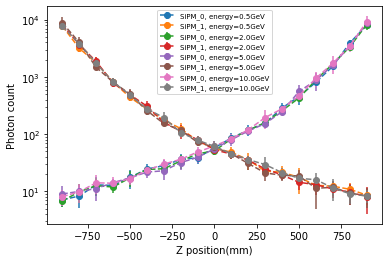

In [ ]:
energyValue, indices = np.unique(energy_z, return_index=True)

fig, ax = plt.subplots()
for energyIndex in range(energyValue.shape[0]):
    if energyIndex == energyValue.shape[0]-1:
        for SiPMNb in range(SiPMCount):
            ax.errorbar(
                zPosition[indices[energyIndex]:],
                mean_z[SiPMNb][indices[energyIndex]:],
                rms_z[SiPMNb][indices[energyIndex]:],
                fmt='o--',
                label=f"SiPM_{SiPMNb}, energy={energyValue[energyIndex]}GeV")
    else:
        for SiPMNb in range(SiPMCount):
            ax.errorbar(
                zPosition[indices[energyIndex]:indices[energyIndex+1]],
                mean_z[SiPMNb][indices[energyIndex]:indices[energyIndex+1]],
                rms_z[SiPMNb][indices[energyIndex]:indices[energyIndex+1]],
                fmt='o--',
                label=f"SiPM_{SiPMNb}, energy={energyValue[energyIndex]}GeV")

ax.set_xlabel("Z position(mm)")
ax.set_ylabel("Photon count")
ax.set_yscale('log')
ax.legend(fontsize=7)
plt.savefig("./figure/muon_z.png", dpi=600, bbox_inches='tight')

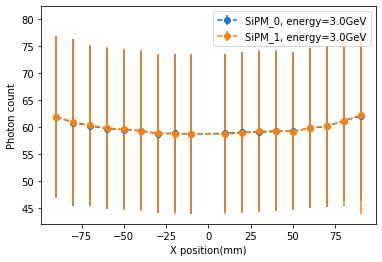

In [17]:
energyValue, indices = np.unique(energy_x, return_index=True)

fig, ax = plt.subplots()
for energyIndex in range(energyValue.shape[0]):
    if energyIndex == energyValue.shape[0]-1:
        for SiPMNb in range(SiPMCount):
            ax.errorbar(
                xPosition[indices[energyIndex]:],
                mean_x[SiPMNb][indices[energyIndex]:],
                rms_x[SiPMNb][indices[energyIndex]:],
                fmt='o--',
                label=f"SiPM_{SiPMNb}, energy={energyValue[energyIndex]}GeV")
    else:
        for SiPMNb in range(SiPMCount):
            ax.errorbar(
                xPosition[indices[energyIndex]:indices[energyIndex+1]],
                mean_x[SiPMNb][indices[energyIndex]:indices[energyIndex+1]],
                rms_x[SiPMNb][indices[energyIndex]:indices[energyIndex+1]],
                fmt='o--',
                label=f"SiPM_{SiPMNb}, energy={energyValue[energyIndex]}GeV")

ax.set_xlabel("X position(mm)")
ax.set_ylabel("Photon count")
ax.legend()
plt.savefig("./figure/muon_x.png", dpi=600, bbox_inches='tight')

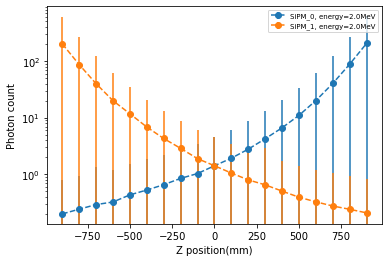

In [10]:
energyValue, indices = np.unique(energy_z_gamma, return_index=True)

fig, ax = plt.subplots()
for energyIndex in range(energyValue.shape[0]):
    if energyIndex == energyValue.shape[0]-1:
        for SiPMNb in range(SiPMCount):
            ax.errorbar(
                zPosition_gamma[indices[energyIndex]:],
                mean_z_gamma[SiPMNb][indices[energyIndex]:],
                rms_z_gamma[SiPMNb][indices[energyIndex]:],
                fmt='o--',
                label=f"SiPM_{SiPMNb}, energy={energyValue[energyIndex]*1000}MeV")
    '''
    else:
        for SiPMNb in range(SiPMCount):
            ax.errorbar(
                zPosition_gamma[indices[energyIndex]:indices[energyIndex+1]],
                mean_z_gamma[SiPMNb][indices[energyIndex]:indices[energyIndex+1]],
                rms_z_gamma[SiPMNb][indices[energyIndex]:indices[energyIndex+1]],
                fmt='o--',
                label=f"SiPM_{SiPMNb}, energy={energyValue[energyIndex]*1000}MeV")
    '''
ax.set_xlabel("Z position(mm)")
ax.set_ylabel("Photon count")
ax.set_yscale('log')
ax.legend(fontsize=7)
plt.savefig("./figure/gamma_z_2MeV.png", dpi=600, bbox_inches='tight')